In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
from pyecharts import options as opts
from pyecharts.charts import Page,Bar
from pandas.core.frame import DataFrame

from pyecharts.globals import ThemeType

In [2]:
sj=pd.read_csv(r'./数据/基金处理后信息.csv',dtype={'代码':str})#让代码读取数据为str
sj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8769 non-null   int64  
 1   Unnamed: 0.1  8769 non-null   int64  
 2   代码            8769 non-null   object 
 3   名称            8769 non-null   object 
 4   类型            8767 non-null   object 
 5   当天日期          8769 non-null   object 
 6   当天净值          8769 non-null   float64
 7   近一个月涨幅        8769 non-null   float64
 8   近三个月涨幅        8769 non-null   float64
 9   近六个月涨幅        8769 non-null   float64
 10  今年以来涨幅        8769 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 753.7+ KB


## 各基金的类型分布

Text(0.5, 1.0, '各类基金数量')

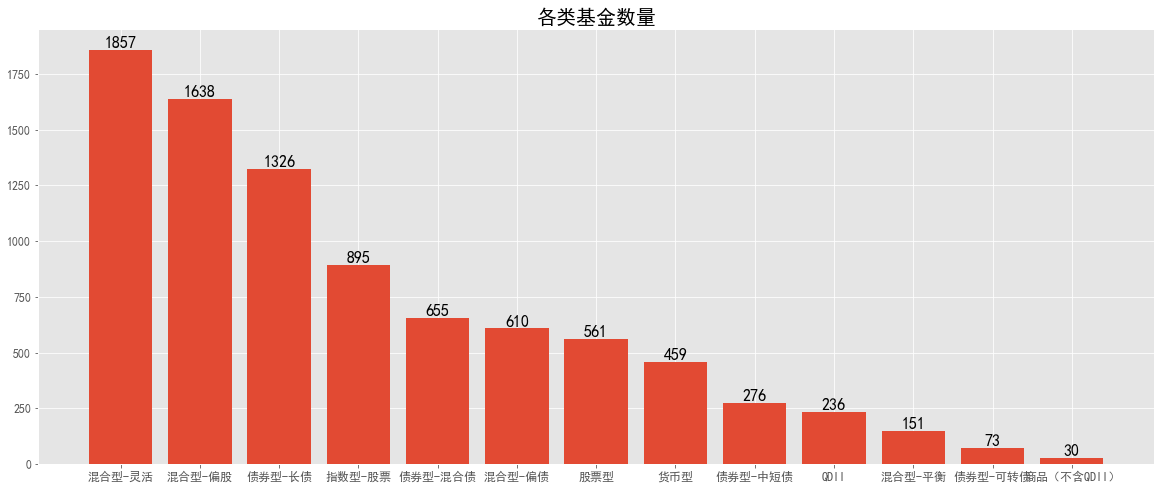

In [3]:
# 按照类型进行分组
分组数量=sj.groupby('类型').agg(基金数量=('类型','count')).\
sort_values(by='基金数量',ascending=False).reset_index('类型')
# 图表展示
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x='类型',height='基金数量',data=分组数量)
for a,b in zip(range(len(分组数量.类型)),分组数量.基金数量):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=16)
plt.title('各类基金数量',fontdict={'fontsize':20})

从此图可以看出，在基金类型中占比最高的是混合型-偏股、混合型-灵活、债券型-长债、指数型-股票这四种，所以我接下来是对这五种类型的股票进行分析。

## 对这四种类型提取代表的基金（今年以来涨幅前十名）

In [4]:
#混合型-偏股今年以来涨幅前十名
hhg=pd.read_csv(r'./类型/混合型-偏股.csv',dtype={'代码':str})
hhg=hhg.sort_values(by='近六个月涨幅',axis=0,ascending=False).reset_index(drop=True)
hhg=hhg.head(10)

hhg

Unnamed: 0  Unnamed: 0.1      代码             名称      类型        当天日期  \
0        4322          4322  006736     国投瑞银先进制造混合  混合型-偏股  2021-09-22   
1        4857          4857  007689     国投瑞银新能源混合A  混合型-偏股  2021-09-22   
2        4858          4858  007690     国投瑞银新能源混合C  混合型-偏股  2021-09-22   
3         148           148  000209      信诚新兴产业混合A  混合型-偏股  2021-09-22   
4        6279          6279  010135  泰达高研发6个月持有混合A  混合型-偏股  2021-09-22   
5        6280          6280  010136  泰达高研发6个月持有混合C  混合型-偏股  2021-09-22   
6        8529          8529  162201       泰达宏利成长混合  混合型-偏股  2021-09-22   
7        5957          5957  009644   东方阿尔法优势产业混合A  混合型-偏股  2021-09-22   
8        5958          5958  009645   东方阿尔法优势产业混合C  混合型-偏股  2021-09-22   
9        9092          9092  400015      东方新能源汽车混合  混合型-偏股  2021-09-22   

     当天净值  近一个月涨幅  近三个月涨幅  近六个月涨幅  今年以来涨幅  
0  5.2650   17.42   72.72  116.93   90.30  
1  4.0335   17.67   72.73  116.13   93.02  
2  4.0039   17.62   72.56  115.70   92.46  
3  5.6815    9.45   53.85  108.65   96.39  
4  1.5177   10.93   36.01   99.54   59.22  
5  1.5133   10.91   35.90   99.25   58.88  
6  2.7523   11.14   35.71   97.57   63.57  
7  2.4175    7.27   48.97   94.35   84.22  
8  2.4028    7.22   48.79   93.85   83.56  
9  4.7297    6.61   39.12   91.06   68.47

In [5]:
#混合型-灵活今年以来涨幅前十名
hhl=pd.read_csv(r'./类型/混合型-灵活.csv',dtype={'代码':str})
hhl['今年以来涨幅']#
hhl=hhl.sort_values(by='近六个月涨幅',axis=0,ascending=False).reset_index(drop=True)
hhl=hhl.head(10)
hhl

Unnamed: 0  Unnamed: 0.1      代码              名称      类型        当天日期  \
0        1168          1168  001704    国投瑞银进宝灵活配置混合  混合型-灵活  2021-09-22   
1        1603          1603  002296       长城行业轮动混合A  混合型-灵活  2021-09-22   
2         438           438  000689      前海开源新经济混合A  混合型-灵活  2021-09-22   
3        8711          8711  167001     平安鼎泰混合(LOF)  混合型-灵活  2021-09-22   
4        8712          8712  167002     平安鼎越混合(LOF)  混合型-灵活  2021-09-22   
5        9723          9723  590003    中邮核心优势灵活配置混合  混合型-灵活  2021-09-22   
6        1345          1345  001933        华商新兴活力混合  混合型-灵活  2021-09-22   
7        1260          1260  001822    华商智能生活灵活配置混合  混合型-灵活  2021-09-22   
8        1529          1529  002190         农银新能源主题  混合型-灵活  2021-09-22   
9        3343          3343  005076  创金合信优选回报灵活配置混合  混合型-灵活  2021-09-22   

     当天净值  近一个月涨幅  近三个月涨幅  近六个月涨幅  今年以来涨幅  
0  5.2980   19.53   75.24  121.92   89.44  
1  2.8699   11.13   47.38  113.34   98.01  
2  3.1440    3.79   39.05  105.22   86.26  
3  2.4750   16.32   52.95  104.85   84.03  
4  3.4037   16.39   58.05   97.40   78.59  
5  3.6650   22.62   69.21   95.78   85.85  
6  2.8260    8.73   46.50   91.20   61.21  
7  2.9030    8.73   41.75   87.17   58.12  
8  4.3447    6.34   32.13   82.42   55.78  
9  1.5867    3.40   48.34   81.04   55.22

In [6]:
#股票型今年以来涨幅前十名
hhc=pd.read_csv(r'./类型/股票型.csv',dtype={'代码':str})
hhc=hhc.sort_values(by='近六个月涨幅',axis=0,ascending=False).reset_index(drop=True)
hhc=hhc.head(10)
hhc

Unnamed: 0  Unnamed: 0.1      代码             名称   类型        当天日期    当天净值  \
0        3704          3704  005669     前海开源公用事业股票  股票型  2021-09-22  3.1637   
1         530           530  000828      泰达转型机遇股票A  股票型  2021-09-22  3.9360   
2        3853          3853  005927   创金合信新能源汽车股票A  股票型  2021-09-22  3.7756   
3        3854          3854  005928   创金合信新能源汽车股票C  股票型  2021-09-22  3.6847   
4         830           830  001245       工银生态环境股票  股票型  2021-09-22  2.8760   
5        6911          6911  011146  创金气候变化责任投资股票A  股票型  2021-09-22  1.7127   
6        6912          6912  011147  创金气候变化责任投资股票C  股票型  2021-09-22  1.7078   
7        3239          3239  004925  长信低碳环保行业量化股票A  股票型  2021-09-22  2.9862   
8        5638          5638  009147      建信新能源行业股票  股票型  2021-09-22  2.8795   
9        3314          3314  005037      银华新能源新材料A  股票型  2021-09-22  2.3429   

   近一个月涨幅  近三个月涨幅  近六个月涨幅  今年以来涨幅  
0    5.86   43.25  112.63   90.42  
1   10.47   35.91  103.10   74.47  
2    3.18   45.84   91.01   74.97  
3    3.12   45.59   90.34   74.09  
4    8.41   48.02   86.63   60.76  
5    3.37   44.86   85.06   69.07  
6    3.33   44.72   84.69   68.59  
7   10.35   35.29   82.85   59.01  
8   11.84   42.28   81.87   66.58  
9    3.41   28.47   66.40   50.47

In [7]:
#指数型-股票今年以来涨幅前十名
zsg=pd.read_csv(r'./类型/指数型-股票.csv',dtype={'代码':str})
zsg=zsg.sort_values(by='近六个月涨幅',axis=0,ascending=False).reset_index(drop=True)
zsg=zsg.head(10)
zsg

Unnamed: 0  Unnamed: 0.1      代码                 名称      类型        当天日期  \
0        8737          8737  168204      中融中证煤炭指数(LOF)  指数型-股票  2021-09-22   
1        5175          5175  008279       国泰中证煤炭ETF联接A  指数型-股票  2021-09-22   
2        5176          5176  008280       国泰中证煤炭ETF联接C  指数型-股票  2021-09-22   
3        8496          8496  161724   招商中证煤炭等权指数(LOF)A  指数型-股票  2021-09-22   
4        8419          8419  161032     富国中证煤炭指数(LOF)A  指数型-股票  2021-09-22   
5        9246          9246  501057        汇添富中证新能源汽车A  指数型-股票  2021-09-22   
6        9247          9247  501058        汇添富中证新能源汽车C  指数型-股票  2021-09-22   
7        8415          8415  161028  富国中证新能源汽车指数(LOF)A  指数型-股票  2021-09-22   
8        5585          5585  009067    国泰中证新能源汽车ETF联接A  指数型-股票  2021-09-22   
9        5586          5586  009068    国泰中证新能源汽车ETF联接C  指数型-股票  2021-09-22   

     当天净值  近一个月涨幅  近三个月涨幅  近六个月涨幅  今年以来涨幅  
0  1.8420   35.44   55.18   83.28   89.12  
1  2.4343   33.15   53.57   81.79   91.09  
2  2.4225   33.11   53.46   81.52   90.67  
3  1.9504   34.74   50.32   78.95   79.33  
4  1.9930   34.03   51.79   77.79   87.66  
5  3.1382    1.73   24.63   61.88   46.85  
6  3.1086    1.70   24.55   61.67   46.58  
7  1.5240    2.70   23.70   60.25   43.64  
8  2.8542    2.76   23.83   59.40   44.28  
9  2.8421    2.73   23.74   59.16   43.96

## 绘制多图

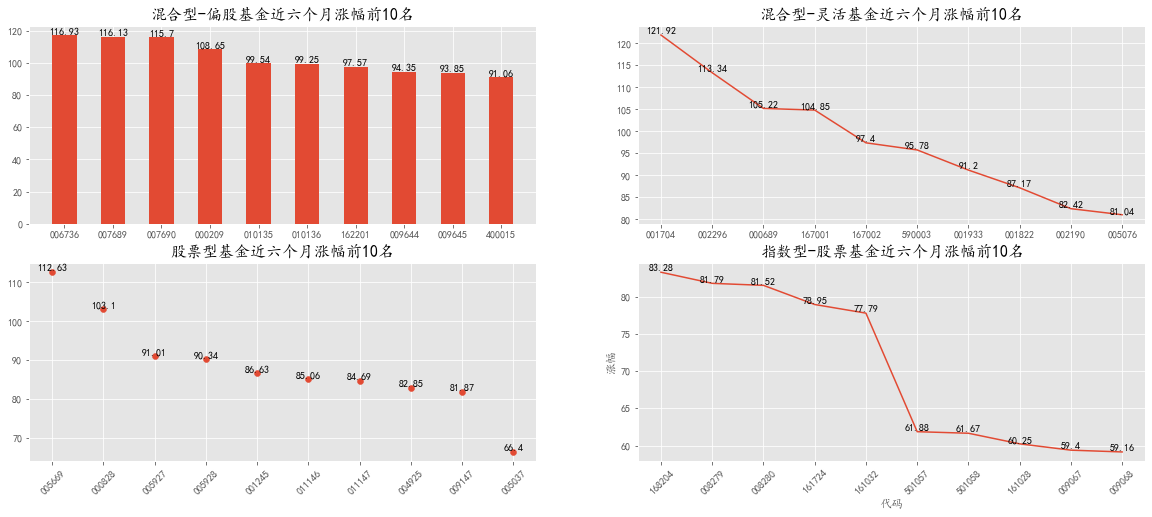

In [8]:
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False
#绘制多图
fig,axes=plt.subplots(2,2,figsize=(20,8))
#第一个柱形图
ax1=plt.subplot(221)
plt.title("混合型-偏股基金近六个月涨幅前10名",size=16)
plt.bar(hhg['代码'],  hhg['近六个月涨幅'],width=0.5)
for a, b in zip(hhg['代码'], hhg['近六个月涨幅']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
#第二个折线图
ax2=plt.subplot(222)
plt.title("混合型-灵活基金近六个月涨幅前10名",size=16)
plt.plot(hhl['代码'],  hhl['近六个月涨幅'])
for a, b in zip(hhl['代码'], hhl['近六个月涨幅']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
#第三个散点图
ax3=plt.subplot(223)
plt.xticks(rotation=45)
plt.title("股票型基金近六个月涨幅前10名",size=16)
plt.scatter(hhc['代码'],  hhc['近六个月涨幅'])
for a, b in zip(hhc['代码'], hhc['近六个月涨幅']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
#第四个图
ax4=plt.subplot(224)
plt.plot(zsg['代码'],zsg['近六个月涨幅'])
plt.xlabel("代码")
plt.ylabel("涨幅")

plt.xticks(rotation=45)
plt.title("指数型-股票基金近六个月涨幅前10名",size=16)
plt.grid(True)
for a, b in zip(zsg['代码'], zsg['近六个月涨幅']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

ax1,ax2,ax3,ax4=axes.flatten()

## 通过这是几个图可以直观的看出近六个月这四种基金涨幅前三个是（混合型-偏股 006736 007689 007690）（混合型-灵活  001704 002296 000689）（股票型 005669 000828 005927）（指数型-股票 168204 008279 008280）.所以我就这四个基金来进行分析，由于债券型的基金没有可观的数据，故而清除。

In [9]:
#将四个基金的基本数据存储在一起
code_l=['006736','001704','005669','168204']
t={"代码":code_l}
print(t)
fund_2=DataFrame(t)
fund_2

{'代码': ['006736', '001704', '005669', '168204']}


代码
0  006736
1  001704
2  005669
3  168204

In [10]:
#将基金代码和名称联系起来，按代码填上该基金的名称和类型
fund_nav = pd.merge(sj,fund_2, how='inner', on=['代码'])
fund_nav

Unnamed: 0  Unnamed: 0.1      代码             名称      类型        当天日期  \
0        1168          1168  001704   国投瑞银进宝灵活配置混合  混合型-灵活  2021-09-22   
1        3704          3704  005669     前海开源公用事业股票     股票型  2021-09-22   
2        4322          4322  006736     国投瑞银先进制造混合  混合型-偏股  2021-09-22   
3        8737          8737  168204  中融中证煤炭指数(LOF)  指数型-股票  2021-09-22   

     当天净值  近一个月涨幅  近三个月涨幅  近六个月涨幅  今年以来涨幅  
0  5.2980   19.53   75.24  121.92   89.44  
1  3.1637    5.86   43.25  112.63   90.42  
2  5.2650   17.42   72.72  116.93   90.30  
3  1.8420   35.44   55.18   83.28   89.12

In [11]:
name=['近一个月涨幅','近三个月涨幅','近六个月涨幅','今年以来涨幅']
x={'近一个月涨幅':fund_nav['近一个月涨幅'],'近三个月涨幅':fund_nav['近三个月涨幅'],'近六个月涨幅':fund_nav['近六个月涨幅'],'今年以来涨幅':fund_nav['今年以来涨幅']}
fund=DataFrame(x)
fund

近一个月涨幅  近三个月涨幅  近六个月涨幅  今年以来涨幅
0   19.53   75.24  121.92   89.44
1    5.86   43.25  112.63   90.42
2   17.42   72.72  116.93   90.30
3   35.44   55.18   83.28   89.12

## 做出四种类型的涨幅第一的四个基金来进行可视化分析


In [12]:
 
###柱形图

c = (
    Bar(
        init_opts=opts.InitOpts(  # 初始配置项
            theme=ThemeType.MACARONS,
            animation_opts=opts.AnimationOpts(
                animation_delay=1000, animation_easing="cubicOut"  # 初始动画延迟和缓动效果
            ))
    )
        .add_xaxis(xaxis_data=name)  # x轴
        .add_yaxis("混合型-灵活(001704)",list(fund.iloc[0])) # y轴
        .add_yaxis("股票型     (005669)",list(fund.iloc[1]))  # y轴
        .add_yaxis("混合型-偏股(006736)",list(fund.iloc[2])) # y轴
        .add_yaxis("指数型-股票(168204)",list(fund.iloc[3])) # y轴
        .set_global_opts(
        title_opts=opts.TitleOpts(title='涨跌幅',  # 标题配置和调整位置
                                  title_textstyle_opts=opts.TextStyleOpts(
                                      font_family='SimHei', font_size=25, font_weight='bold', color='red',
                                  ), pos_left="90%", pos_top="10",
                                  ),
        xaxis_opts=opts.AxisOpts(name='时间', axislabel_opts=opts.LabelOpts(rotate=45)),
        # 设置x名称和Label rotate解决标签名字过长使用
        yaxis_opts=opts.AxisOpts(name='涨跌点'),

    )
#         .render("基金各个阶段涨跌幅.html")
)
c.render_notebook()


In [13]:
fund_nav2=fund_nav[['代码','名称','类型']]

In [14]:
fund_nav2

代码             名称      类型
0  001704   国投瑞银进宝灵活配置混合  混合型-灵活
1  005669     前海开源公用事业股票     股票型
2  006736     国投瑞银先进制造混合  混合型-偏股
3  168204  中融中证煤炭指数(LOF)  指数型-股票

In [15]:
#将数据保存为csv文件
fund_nav2.to_csv('./数据/四个基金.csv',encoding='utf_8_sig')

## 将需要预测的基金数据存入csv


In [16]:
#将混合型-偏股前三名存在一起
code_l=['006736','007689','007690']
t={"代码":code_l}
hunhe=DataFrame(t)
#将基金代码和名称联系起来，按代码填上该基金的名称和类型
hunhe = pd.merge(sj,hunhe, how='inner', on=['代码'])
hunhe=hunhe[['代码','名称','类型']]
#将数据保存为csv文件
hunhe.to_csv('./数据/混合型-偏股前三.csv',encoding='utf_8_sig')

In [17]:
#将股票型前三名存在一起
code_l=['005669','000828','005927']
t={"代码":code_l}
gupiao=DataFrame(t)
#将基金代码和名称联系起来，按代码填上该基金的名称和类型
gupiao = pd.merge(sj,gupiao, how='inner', on=['代码'])
gupiao=gupiao[['代码','名称','类型']]
#将数据保存为csv文件
gupiao.to_csv('./数据/股票型前三.csv',encoding='utf_8_sig')

In [18]:
#将指数型-股票前三名存在一起
code_l=['168204','008279','008280']
t={"代码":code_l}
print(t)
zhishu=DataFrame(t)
#将基金代码和名称联系起来，按代码填上该基金的名称和类型
zhishu = pd.merge(sj,zhishu, how='inner', on=['代码'])
zhishu=zhishu[['代码','名称','类型']]
#将数据保存为csv文件
zhishu.to_csv('./数据/指数型-股票前三.csv',encoding='utf_8_sig')

{'代码': ['168204', '008279', '008280']}


In [19]:
#将混合型-灵活前三名存在一起
code_l=['001704','002296','000689']
t={"代码":code_l}
hunhe2=DataFrame(t)
#将基金代码和名称联系起来，按代码填上该基金的名称和类型
hunhe2 = pd.merge(sj,hunhe2, how='inner', on=['代码'])
hunhe2=hunhe2[['代码','名称','类型']]
#将数据保存为csv文件
hunhe2.to_csv('./数据/混合型-灵活前三.csv',encoding='utf_8_sig')